# Analyzing the SCImago Journal Rank in 2017

In [1]:
import pandas as pd
import seaborn as sns
pd.options.display.max_colwidth = 200 # Default is 50
%matplotlib inline

In the
[SCImago Journal Rank's web site](https://www.scimagojr.com/journalrank.php)
we can get the journal rank in a format based on CSV
(CSV stands for *comma separated values*,
but the CSV-like files we can download from the SJR
use commas as thousands separators
and semi-colons as value separators),
which can be directly loaded by the Pandas CSV reader function,
requiring some extra parameters:

In [2]:
sjr2017scielo = pd.read_csv("scimagojr_2017_scielo.csv",
                            sep=";", thousands=",", index_col="Rank")
sjr2017open = pd.read_csv("scimagojr_2017_open.csv",
                          sep=";", thousands=",", index_col="Rank")

The first few entries:

In [3]:
sjr2017scielo.head().T

Rank,1,2,3,4,5
Sourceid,21100853560,15205,21100200421,21807,22596
Title,African Journal of Disability,Memorias do Instituto Oswaldo Cruz,Journal of Soil Science and Plant Nutrition,Brazilian Journal of Infectious Diseases,Revista de Saude Publica
Type,journal,journal,journal,journal,journal
Issn,"22267220, 22239170","00740276, 16788060",07189516,14138670,00348910
SJR,1463,1172,823,817,807
SJR Best Quartile,Q1,Q1,Q1,Q2,Q2
H index,4,76,24,37,65
Total Docs. (2017),0,124,80,124,164
Total Docs. (3years),7,438,235,401,351
Total Refs.,0,3682,2860,2919,1015


They have a dedicated web page for help
that includes the description of each field:
<https://www.scimagojr.com/help.php>

In [4]:
sjr2017scielo.head().T

Rank,1,2,3,4,5
Sourceid,21100853560,15205,21100200421,21807,22596
Title,African Journal of Disability,Memorias do Instituto Oswaldo Cruz,Journal of Soil Science and Plant Nutrition,Brazilian Journal of Infectious Diseases,Revista de Saude Publica
Type,journal,journal,journal,journal,journal
Issn,"22267220, 22239170","00740276, 16788060",07189516,14138670,00348910
SJR,1463,1172,823,817,807
SJR Best Quartile,Q1,Q1,Q1,Q2,Q2
H index,4,76,24,37,65
Total Docs. (2017),0,124,80,124,164
Total Docs. (3years),7,438,235,401,351
Total Refs.,0,3682,2860,2919,1015


The `SJR` column have the *SCImago Journal Rank* index
we're here to analyze.
The same web page have
[a PDF explaining the mathematics that defines it](
  https://www.scimagojr.com/SCImagoJournalRank.pdf
).

## Do all SciELO entries have open access? 

Yes! We can see this by comparing the number of distinct entries
in the union of the dataframes.

In [5]:
pd.DataFrame([
    ("Open", "all",
     sjr2017open.shape[0]
    ),
    ("Open", "distinct ISSNs",
     sjr2017open["Issn"].drop_duplicates().size,
    ),
    ("Open", "distinct titles",
     sjr2017open["Title"].drop_duplicates().size,
    ),
    ("Open", "distinct title-ISSN pairs",
     sjr2017open[["Title", "Issn"]].drop_duplicates().shape[0],
    ),
    ("SciELO", "all",
     sjr2017scielo.shape[0],
    ),
    ("SciELO", "distinct ISSNs",
     sjr2017scielo["Issn"].drop_duplicates().size,
    ),
    ("SciELO", "distinct titles",
     sjr2017scielo["Title"].drop_duplicates().size,
    ),
    ("SciELO", "distinct title-ISSN pairs",
     sjr2017scielo[["Title", "Issn"]].drop_duplicates().shape[0],
    ),
    ("Union of Open and SciELO", "all",
     pd.concat([sjr2017open.drop_duplicates(),
                sjr2017scielo.drop_duplicates()])
       .drop_duplicates().shape[0],
    ),
    ("Union of Open and SciELO", "distinct ISSNs",
     pd.concat([sjr2017open.drop_duplicates(),
                sjr2017scielo.drop_duplicates()])["Issn"]
       .drop_duplicates().size,
    ),
    ("Union of Open and SciELO", "distinct titles",
        pd.concat([sjr2017open.drop_duplicates(),
                   sjr2017scielo.drop_duplicates()])["Title"]
          .drop_duplicates().size,
    ),
    ("Union of Open and SciELO", "distinct title-ISSN pairs",
        pd.concat([sjr2017open.drop_duplicates(),
                   sjr2017scielo.drop_duplicates()])[["Title", "Issn"]]
          .drop_duplicates().shape[0],
    ),
], columns=["source", "selection", "count"]) \
    .set_index(["source", "selection"]) \
    .unstack("source")

count                                
source                     Open SciELO Union of Open and SciELO
selection                                                      
all                        4503    628                     4503
distinct ISSNs             4501    628                     4501
distinct title-ISSN pairs  4503    628                     4503
distinct titles            4502    628                     4502

Seeing the title-ISSNs pairs,
the dataframe with open access entries
and the union of both dataframes have the same number of distinct entries,
as expected.
But we can see some ISSN duplication and title duplication
in the *Open* dataframe.

## Understanding the duplicates in the open access dataframe

These are the duplicated ISSNs:

In [6]:
sjr2017open_size_gt1 = sjr2017open.groupby("Issn").size() > 1
dupl_issns = sjr2017open_size_gt1[sjr2017open_size_gt1].index.tolist()
dupl_issns

['16725123', '20365438']

In [7]:
sjr2017open[sjr2017open["Issn"].isin(dupl_issns)].T

Rank,1154,3223,4153,4171
Sourceid,130135,21100790340,21100391400,21100786380
Title,International Journal of Ophthalmology,Oxford Medical Case Reports,International Eye Science,Perspectives on Federalism
Type,journal,journal,journal,journal
Issn,16725123,20365438,16725123,20365438
SJR,576,178,109,107
SJR Best Quartile,Q2,Q4,Q4,Q4
H index,18,4,5,1
Total Docs. (2017),336,90,626,26
Total Docs. (3years),619,137,1990,20
Total Refs.,9780,838,8260,1254


The `2036-5438` regards to *Perspectives on Federalism*,
whereas *Oxford Medical Case Reports* should probably have been`2053-8855`.
The `1672-5123` entries looks like the same,
the titles are probably distinct translations of 国际眼科杂志,
and the entries perhaps regards to two timings of the same journal,
but the different numbers for everything else
makes it really hard to *normalize* anything.
For now, let's simply accept these as different journals.

How about the duplicate title?

In [8]:
sjr2017open_title_gt1 = sjr2017open.groupby("Title").size() > 1
dupl_titles = sjr2017open_title_gt1[sjr2017open_title_gt1].index.tolist()
dupl_titles

['Alea']

In [9]:
sjr2017open[sjr2017open["Title"] == "Alea"].T

Rank,640,4448
Sourceid,21100231200,12100157116
Title,Alea,Alea
Type,journal,journal
Issn,19800436,1517106X
SJR,934,100
SJR Best Quartile,Q2,Q4
H index,10,3
Total Docs. (2017),10,42
Total Docs. (3years),101,98
Total Refs.,272,718


It's just a coincidence.

## Getting the open access entries that aren't in the SciELO dataframe

Since every field match (but the *Rank* index)
and every SciELO entry is in the open access entries,
we can just get the symmetric difference.

In [10]:
sjr2017openns = pd.concat([sjr2017open, sjr2017scielo], sort=False) \
                  .drop_duplicates(keep=False)
sjr2017openns.shape

(3875, 17)

We can build a full dataset as the CSV regarding the open access entries,
just including a new boolean `scielo` column.

In [11]:
dataset = pd.concat([
    sjr2017openns.assign(SciELO=False),
    sjr2017scielo.assign(SciELO=True),
])

## Data from countries not in SciELO

The SCImago Journal Rank data for entries coming from SciELO
regards to some few countries:

In [12]:
scielo_countries = sjr2017scielo["Country"].unique()
scielo_countries

array(['South Africa', 'Brazil', 'Chile', 'Spain', 'Mexico',
       'United States', 'Argentina', 'Costa Rica', 'Netherlands',
       'Colombia', 'Portugal', 'Cuba', 'Peru', 'Venezuela', 'Uruguay'],
      dtype=object)

This open dataset have a lot of other countries
we won't be able to compare.

In [13]:
dataset["Country"].unique()

array(['United States', 'Austria', 'United Kingdom', 'Germany', 'Sweden',
       'Netherlands', 'France', 'Italy', 'New Zealand', 'Switzerland',
       'Japan', 'Bulgaria', 'Canada', 'China', 'South Korea', 'Egypt',
       'Finland', 'Spain', 'Australia', 'Belgium', 'Qatar', 'India',
       'Turkey', 'Taiwan', 'Greece', 'Czech Republic', 'Hong Kong',
       'Brazil', 'Poland', 'Denmark', 'Bangladesh',
       'United Arab Emirates', 'Russian Federation', 'Hungary',
       'Singapore', 'Saudi Arabia', 'Iran', 'Ukraine', 'Slovenia',
       'Estonia', 'South Africa', 'Croatia', 'Ireland', 'Slovakia',
       'Malaysia', 'Norway', 'Philippines', 'Lithuania', 'Argentina',
       'Israel', 'Serbia', 'Oman', 'Bosnia and Herzegovina', 'Romania',
       'Ethiopia', 'Azerbaijan', 'Portugal', 'Pakistan', 'Puerto Rico',
       'Kazakhstan', 'Mexico', 'Bahrain', 'Tanzania', 'Malawi', 'Kuwait',
       'Latvia', 'Montenegro', 'Indonesia', 'Nigeria', 'Thailand',
       'Kenya', 'Chile', 'Iceland', 'Mold

About one third of the open data not from SciELO
are from a country that have SciELO data:

True     1013
False    2862
Name: Country, dtype: int64

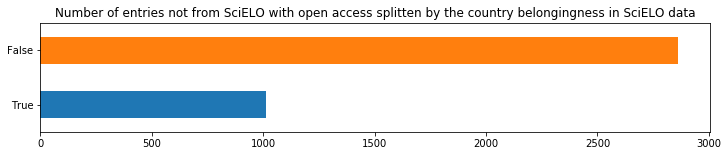

In [14]:
openns_cf_count = (sjr2017openns["Country"]
                       .isin(scielo_countries)
                       .value_counts()
                       .sort_index(ascending=False)
                  )
openns_cf_count.plot.barh(
    title="Number of entries not from SciELO with open access "
          "splitten by the country belongingness in SciELO data",
    figsize=(12, 2),
)
openns_cf_count

The H index and SJR aren't much different in this data split:

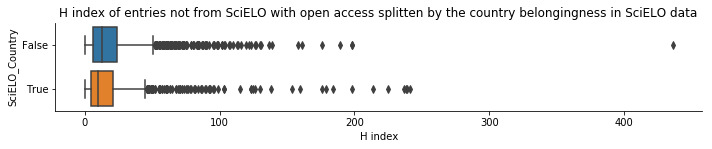

In [15]:
sns.catplot(
    kind="box",
    data=sjr2017openns.assign(
        SciELO_Country=sjr2017openns["Country"].isin(scielo_countries)
    ),
    y="SciELO_Country", orient="h", sharey=False,
    x="H index",
    aspect=5,
    height=2,
).set(title="H index of entries not from SciELO with open access "
            "splitten by the country belongingness in SciELO data",
);

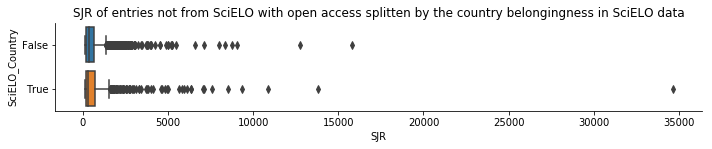

In [16]:
sns.catplot(
    kind="box",
    data=sjr2017openns.assign(
        SciELO_Country=sjr2017openns["Country"].isin(scielo_countries)
    ),
    y="SciELO_Country", orient="h", sharey=False,
    x="SJR",
    aspect=5,
    height=2,
).set(title="SJR of entries not from SciELO with open access "
            "splitten by the country belongingness in SciELO data",
);

## Countries that have SciELO data in SCImage Journal Rank

A proper comparison is difficult for some countries,
since either almost all data is from SciELO,
or almost all data isn't from it:

SciELO,False,True
Country,,
Argentina,6,35
Brazil,91,209
Chile,11,77
Colombia,7,79
Costa Rica,0,2
Cuba,2,19
Mexico,10,76
Netherlands,191,4
Peru,0,7


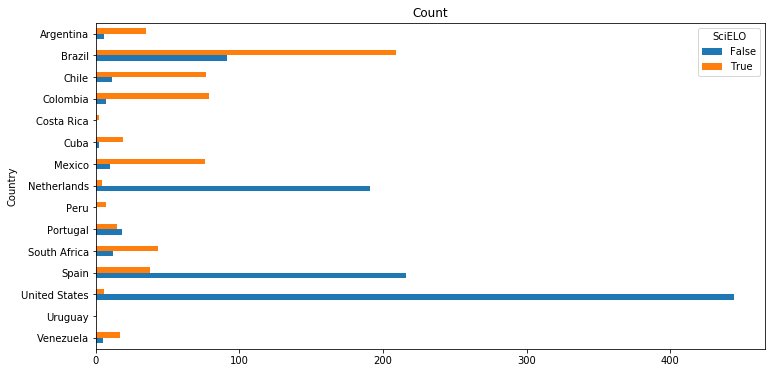

In [17]:
# "cf" stands for Country-filtered
dataset_cf = dataset[dataset["Country"].isin(scielo_countries)]
dataset_cf_count = (dataset_cf
                    .groupby(["Country", "SciELO"])
                    .size()
                    .unstack()
                    .fillna(0)
                    .astype(int)
                   )
dataset_cf_count.iloc[::-1].plot.barh(figsize=(12, 6), title="Count")
dataset_cf_count

The proportion of data in quite different.
We'll should analyze just the data from Portugal and Brazil.
Venezuela has just $22$ entries in total
just $5$ of them aren't from SciELO.

,proportion
Country,
Portugal,0.833333
Brazil,0.435407
Venezuela,0.294118
South Africa,0.279070
Spain,0.175926
Argentina,0.171429
Chile,0.142857
Mexico,0.131579
Cuba,0.105263


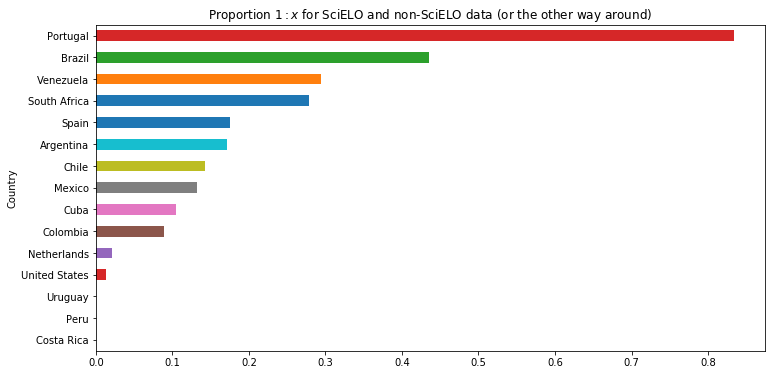

In [18]:
proportions = (
    pd.concat([dataset_cf_count[True] / dataset_cf_count[False],
               dataset_cf_count[False] / dataset_cf_count[True]],
              axis=1)
    .min(axis=1)
    .sort_values(ascending=False)
    .rename("proportion")
)
proportions.iloc[::-1].plot.barh(
    figsize=(12, 6),
    title="Proportion $1:x$ for SciELO and non-SciELO data "
          "(or the other way around)",
)
pd.DataFrame(proportions)

The H index and SJR for the overall data
is greater in open access content not from SciELO:

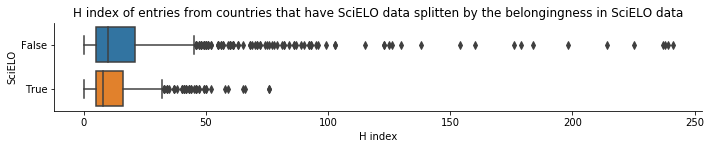

In [19]:
sns.catplot(
    kind="box",
    data=dataset_cf,
    y="SciELO", orient="h", sharey=False,
    x="H index",
    aspect=5,
    height=2,
).set(title="H index of entries from countries that have SciELO data "
            "splitten by the belongingness in SciELO data",
);

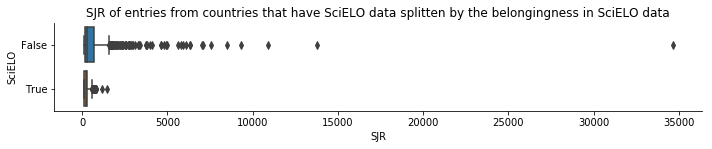

In [20]:
sns.catplot(
    kind="box",
    data=dataset_cf,
    y="SciELO", orient="h", sharey=False,
    x="SJR",
    aspect=5,
    height=2,
).set(title="SJR of entries from countries that have SciELO data "
            "splitten by the belongingness in SciELO data",
);

This difference can be mainly explained
by the data from the United States and Netherlands,
countries which have, together, only $10$ entries from SciELO.
Most of the data from other countries behave the other way around
(but Mexico and, for SJR, Portugal):

In [21]:
dataset_cfne = dataset_cf[~dataset_cf["Country"] # Not empty country
                           .isin(proportions[proportions == 0].index)]

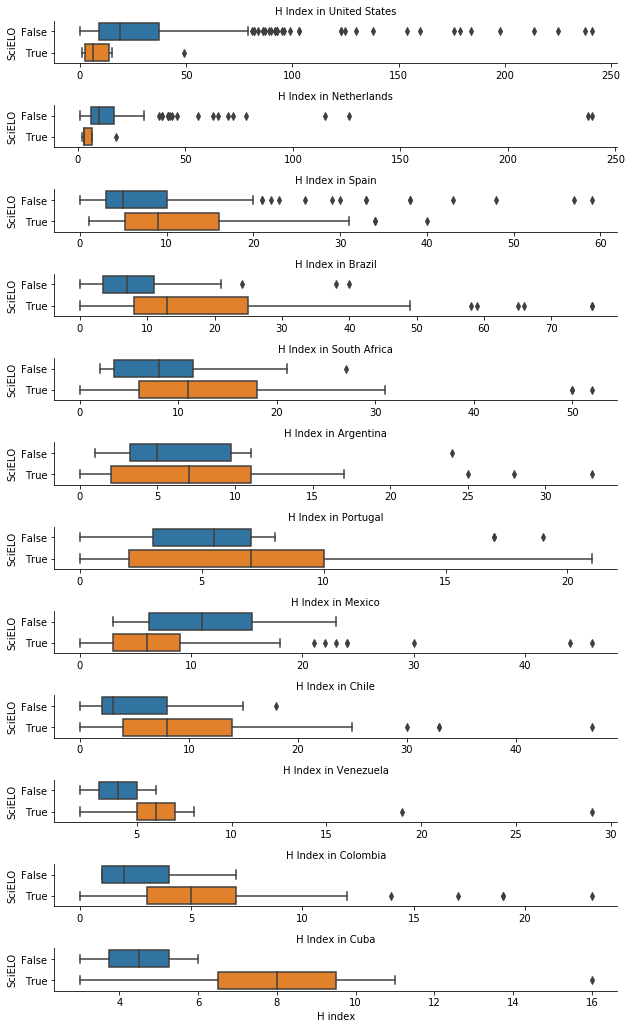

In [22]:
sns.catplot(
    kind="box",
    data=dataset_cfne,
    row="Country",
    y="SciELO", orient="h", sharey=False,
    x="H index",
    aspect=7.4,
    height=1.2,
    sharex=False,
).set_titles("H Index in {row_name}") \
 .fig.tight_layout();

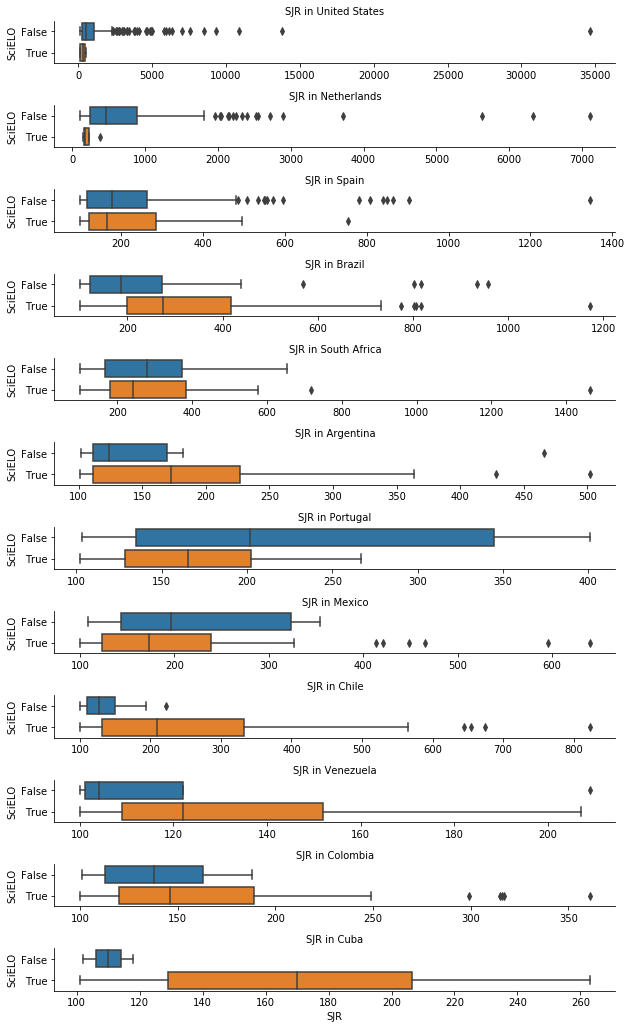

In [23]:
sns.catplot(
    kind="box",
    data=dataset_cfne,
    row="Country",
    y="SciELO", orient="h", sharey=False,
    x="SJR",
    aspect=7.4,
    height=1.2,
    sharex=False,
).set_titles("SJR in {row_name}") \
 .fig.tight_layout();